In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join(os.path.abspath('..')))

In [2]:
training_data = pd.read_csv("../data/train_cleaned_all.csv")
test_data = pd.read_csv("../data/test_cleaned.csv")

# for only linear regression
training_data_l = pd.read_csv("../data/train_scaled.csv")
test_data_l = pd.read_csv("../data/tetst_scaled.csv")

In [3]:
# since 'SeriousDlqin2yrs' is the target variable in your dataset
X = training_data.drop('SeriousDlqin2yrs', axis=1)  # Feature columns
y = training_data['SeriousDlqin2yrs']  # Target variable

Xl = training_data_l.drop('SeriousDlqin2yrs', axis=1)  # Feature columns
yl = training_data_l['SeriousDlqin2yrs']  # Target variable

In [4]:
# Split the data into train and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
Xl_train, Xl_val, yl_train, yl_val = train_test_split(Xl, yl, test_size=0.2, random_state=42)

In [5]:
# Initialize models
logreg = LogisticRegression(solver='liblinear')  # Logistic Regression model
rf = RandomForestClassifier(random_state=42)     # Random Forest model
gb = GradientBoostingClassifier(random_state=42)  # Gradient Boosting model

In [9]:
# Define hyperparameter grids for each model

# Logistic Regression hyperparameters
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [50, 10, 20],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting hyperparameters
gb_param_grid = {
    'n_estimators': [50, 20],
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

In [7]:
# Hyperparameter tuning using GridSearchCV
logreg_grid = GridSearchCV(estimator=logreg, param_grid=logreg_param_grid, cv=5, scoring='roc_auc')
logreg_grid.fit(Xl_train, yl_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [8]:
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 10, 20]},
             scoring='roc_auc')

In [10]:
gb_grid = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=5, scoring='roc_auc')
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [50, 20], 'subsample': [0.8, 1.0]},
             scoring='roc_auc')

In [11]:
# Logistic Regression evaluation
logreg_best_model = logreg_grid.best_estimator_
y_pred_logreg = logreg_best_model.predict(Xl_val)
y_prob_logreg = logreg_best_model.predict_proba(Xl_val)[:, 1]

logreg_auc = roc_auc_score(yl_val, y_prob_logreg)
logreg_precision = precision_score(yl_val, y_pred_logreg)
logreg_recall = recall_score(yl_val, y_pred_logreg)
logreg_f1 = f1_score(yl_val, y_pred_logreg)

In [12]:
# Random Forest evaluation
rf_best_model = rf_grid.best_estimator_
y_pred_rf = rf_best_model.predict(X_val)
y_prob_rf = rf_best_model.predict_proba(X_val)[:, 1]

rf_auc = roc_auc_score(y_val, y_prob_rf)
rf_precision = precision_score(y_val, y_pred_rf)
rf_recall = recall_score(y_val, y_pred_rf)
rf_f1 = f1_score(y_val, y_pred_rf)

In [13]:
  # Gradient Boosting evaluation
gb_best_model = gb_grid.best_estimator_
y_pred_gb = gb_best_model.predict(X_val)
y_prob_gb = gb_best_model.predict_proba(X_val)[:, 1]

gb_auc = roc_auc_score(y_val, y_prob_gb)
gb_precision = precision_score(y_val, y_pred_gb)
gb_recall = recall_score(y_val, y_pred_gb)
gb_f1 = f1_score(y_val, y_pred_gb)


In [14]:
# Print the evaluation results
print(f"Logistic Regression - AUC: {logreg_auc:.4f}, Precision: {logreg_precision:.4f}, Recall: {logreg_recall:.4f}, F1-score: {logreg_f1:.4f}")
print(f"Random Forest - AUC: {rf_auc:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-score: {rf_f1:.4f}")
print(f"Gradient Boosting - AUC: {gb_auc:.4f}, Precision: {gb_precision:.4f}, Recall: {gb_recall:.4f}, F1-score: {gb_f1:.4f}")

Logistic Regression - AUC: 0.8570, Precision: 0.5742, Recall: 0.1727, F1-score: 0.2655
Random Forest - AUC: 0.8648, Precision: 0.6004, Recall: 0.1560, F1-score: 0.2477
Gradient Boosting - AUC: 0.8655, Precision: 0.5428, Recall: 0.1910, F1-score: 0.2825


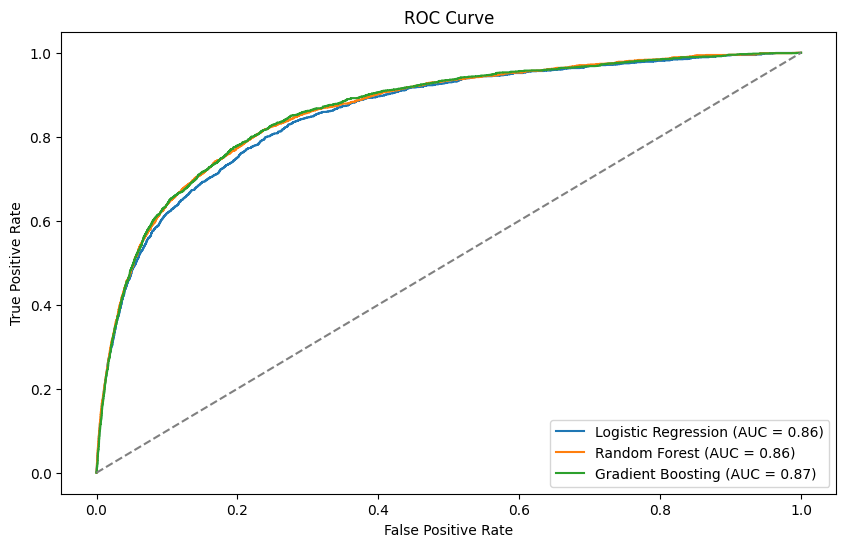

In [15]:
# Optionally plot ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(yl_val, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_val, y_prob_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [21]:
import joblib

# Save the trained model
joblib.dump(logreg_best_model, "../models/logreg_model.pkl")
joblib.dump(rf_best_model, "../models/rf_model.pkl")
joblib.dump(gb_best_model, "../models/gb_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [22]:
# Save the  datasets
X_train.to_csv('../models/X_train.csv', index=False)
Xl_train.to_csv('../models/Xl_train.csv', index=False)